<a href="https://colab.research.google.com/github/pranavinn/localrepo/blob/main/Copy_of_ML_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [ ]:
#Reading the Data

movie_df=pd.read_csv("/content/36238_IMDd-Movie-Database (1).csv")

In [ ]:
movie_df.head(15)

,Title,Release Date,Color/B&W,Genre,Language,Country,Rating,Lead Actor,Director Name,Lead Actor FB Likes,Cast FB Likes,Director FB Likes,Movie FB Likes,IMDb Score (1-10),Total Reviews,Duration (min),Gross Revenue,Budget
0,Over the Hill to the Poorhouse,9/15/1920,Black and White,Crime,English,USA,Not Rated,Stephen Carr,Harry F. Millarde,2.0,4,0,0,4.8,1.0,110.0,3000000,100000
1,Metropolis,1/26/1927,Black and White,Drama,German,Germany,Not Rated,Brigitte Helm,Fritz Lang,136.0,203,756,12000,8.3,260.0,145.0,26435,6000000
2,The Broadway Melody,11-11-1929,Black and White,Musical,English,USA,Passed,Anita Page,Harry Beaumont,77.0,109,4,167,6.3,36.0,100.0,2808000,379000
3,42nd Street,8/29/1933,Black and White,Comedy,English,USA,Unrated,Ginger Rogers,Lloyd Bacon,610.0,995,24,439,7.7,65.0,89.0,2300000,439000
4,Top Hat,4/15/1935,Black and White,Comedy,English,USA,Approved,Ginger Rogers,Mark Sandrich,610.0,824,10,1000,7.8,66.0,81.0,3000000,609000
5,Modern Times,10-07-1936,Black and White,Comedy,English,USA,G,Paulette Goddard,Charles Chaplin,309.0,352,0,0,8.6,120.0,87.0,163245,1500000
6,Snow White and the Seven Dwarfs,02-02-1937,Color,Animation,English,USA,Approved,Adriana Caselotti,William Cottrell,82.0,229,0,0,7.7,145.0,83.0,184925485,2000000
7,Gone with the Wind,11-12-1939,Color,Drama,English,USA,G,Hattie McDaniel,Victor Fleming,503.0,1862,149,16000,8.2,157.0,226.0,198655278,3977000
8,The Wizard of Oz,04-09-1939,Black and White,Adventure,English,USA,Passed,Margaret Hamilton,Victor Fleming,695.0,2509,149,14000,8.1,213.0,102.0,22202612,2800000
9,Fantasia,5/18/1940,Color,Animation,English,USA,G,Leopold Stokowski,James Algar,16.0,16,11,3000,7.8,99.0,120.0,76400000,2280000


In [ ]:
# displaying the number of rows and columns present in the dataset
movie_df.shape

(3724, 18)

In [ ]:
#checking the columns present in dataset
movie_df.columns

Index(['Title', 'Release Date', 'Color/B&W', 'Genre', 'Language', 'Country',
       'Rating', 'Lead Actor', 'Director Name', 'Lead Actor FB Likes',
       'Cast FB Likes', 'Director FB Likes', 'Movie FB Likes',
       'IMDb Score (1-10)', 'Total Reviews', 'Duration (min)', 'Gross Revenue',
       'Budget'],
      dtype='object')

In [ ]:
movie_df.dtypes

Title                   object
Release Date            object
Color/B&W               object
Genre                   object
Language                object
Country                 object
Rating                  object
Lead Actor              object
Director Name           object
Lead Actor FB Likes    float64
Cast FB Likes            int64
Director FB Likes        int64
Movie FB Likes           int64
IMDb Score (1-10)      float64
Total Reviews          float64
Duration (min)         float64
Gross Revenue            int64
Budget                   int64
dtype: object

there are Categorical Columns and Numerical Columns in the dataset

In [ ]:
movie_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Actor FB Likes,3721.0,7.462434e+03,1.553404e+04,0.0,713.00,1000.0,12000.00,6.400000e+05
Cast FB Likes,3724.0,1.104873e+04,1.896052e+04,0.0,1783.75,3784.5,15713.75,6.567300e+05
Director FB Likes,3724.0,7.934823e+02,3.055408e+03,0.0,10.00,58.0,221.00,2.300000e+04
Movie FB Likes,3724.0,8.608095e+03,2.079076e+04,0.0,0.00,170.5,10000.00,3.490000e+05
IMDb Score (1-10),3724.0,6.463507e+00,1.058951e+00,1.6,5.90,6.6,7.20,9.300000e+00
Total Reviews,3723.0,1.598695e+02,1.224336e+02,1.0,71.00,131.0,217.00,8.130000e+02
Duration (min),3723.0,1.097749e+02,2.285222e+01,34.0,95.00,105.0,120.00,3.300000e+02
Gross Revenue,3724.0,4.973239e+07,6.819083e+07,162.0,6407238.50,26822478.5,64470965.00,7.605058e+08
Budget,3724.0,4.437588e+07,2.268809e+08,218.0,9000000.00,23550000.0,50000000.00,1.221550e+10


In [ ]:
#checking missing values in the dataset
any_missing_values = movie_df.isna().any()
any_missing_values

Title                  False
Release Date           False
Color/B&W              False
Genre                  False
Language                True
Country                False
Rating                  True
Lead Actor              True
Director Name          False
Lead Actor FB Likes     True
Cast FB Likes          False
Director FB Likes      False
Movie FB Likes         False
IMDb Score (1-10)      False
Total Reviews           True
Duration (min)          True
Gross Revenue          False
Budget                 False
dtype: bool

In [ ]:
#No of the missing values in the dataset

movie_df.isna().sum()

Title                   0
Release Date            0
Color/B&W               0
Genre                   0
Language                2
Country                 0
Rating                 49
Lead Actor              3
Director Name           0
Lead Actor FB Likes     3
Cast FB Likes           0
Director FB Likes       0
Movie FB Likes          0
IMDb Score (1-10)       0
Total Reviews           1
Duration (min)          1
Gross Revenue           0
Budget                  0
dtype: int64

In [ ]:
#replacing missing values in duration with the median of the values
movie_df["Duration (min)"].fillna(movie_df["Duration (min)"].median(),inplace=True)

In [ ]:
#replacing missing values in Total Reviews with the median of the values
movie_df['Total Reviews'].fillna(movie_df['Total Reviews'].median(),inplace=True)

In [ ]:
#replacing the missing values in Rating with R
movie_df["Rating"].fillna("R", inplace = True)

In [ ]:
#dropping the null values in Language,Lead actor and Lead actor FB Likes
movie_df.dropna(axis=0,subset=['Language','Lead Actor','Lead Actor FB Likes'],inplace=True)

In [ ]:
movie_df.isna().sum()

Title                  0
Release Date           0
Color/B&W              0
Genre                  0
Language               0
Country                0
Rating                 0
Lead Actor             0
Director Name          0
Lead Actor FB Likes    0
Cast FB Likes          0
Director FB Likes      0
Movie FB Likes         0
IMDb Score (1-10)      0
Total Reviews          0
Duration (min)         0
Gross Revenue          0
Budget                 0
dtype: int64

In [ ]:
#dropping the duplicate values
movie_df.drop_duplicates(inplace=True)
movie_df.shape

(3719, 18)

In [ ]:
movie_df["Language"].value_counts()

English       3539
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Danish           3
Thai             3
Persian          3
Dutch            3
Hebrew           3
Aboriginal       2
Dari             2
Indonesian       2
Vietnamese       1
Icelandic        1
None             1
Bosnian          1
Mongolian        1
Arabic           1
Romanian         1
Swedish          1
Czech            1
Maya             1
Zulu             1
Filipino         1
Kazakh           1
Hungarian        1
Aramaic          1
Russian          1
Dzongkha         1
Telugu           1
Name: Language, dtype: int64

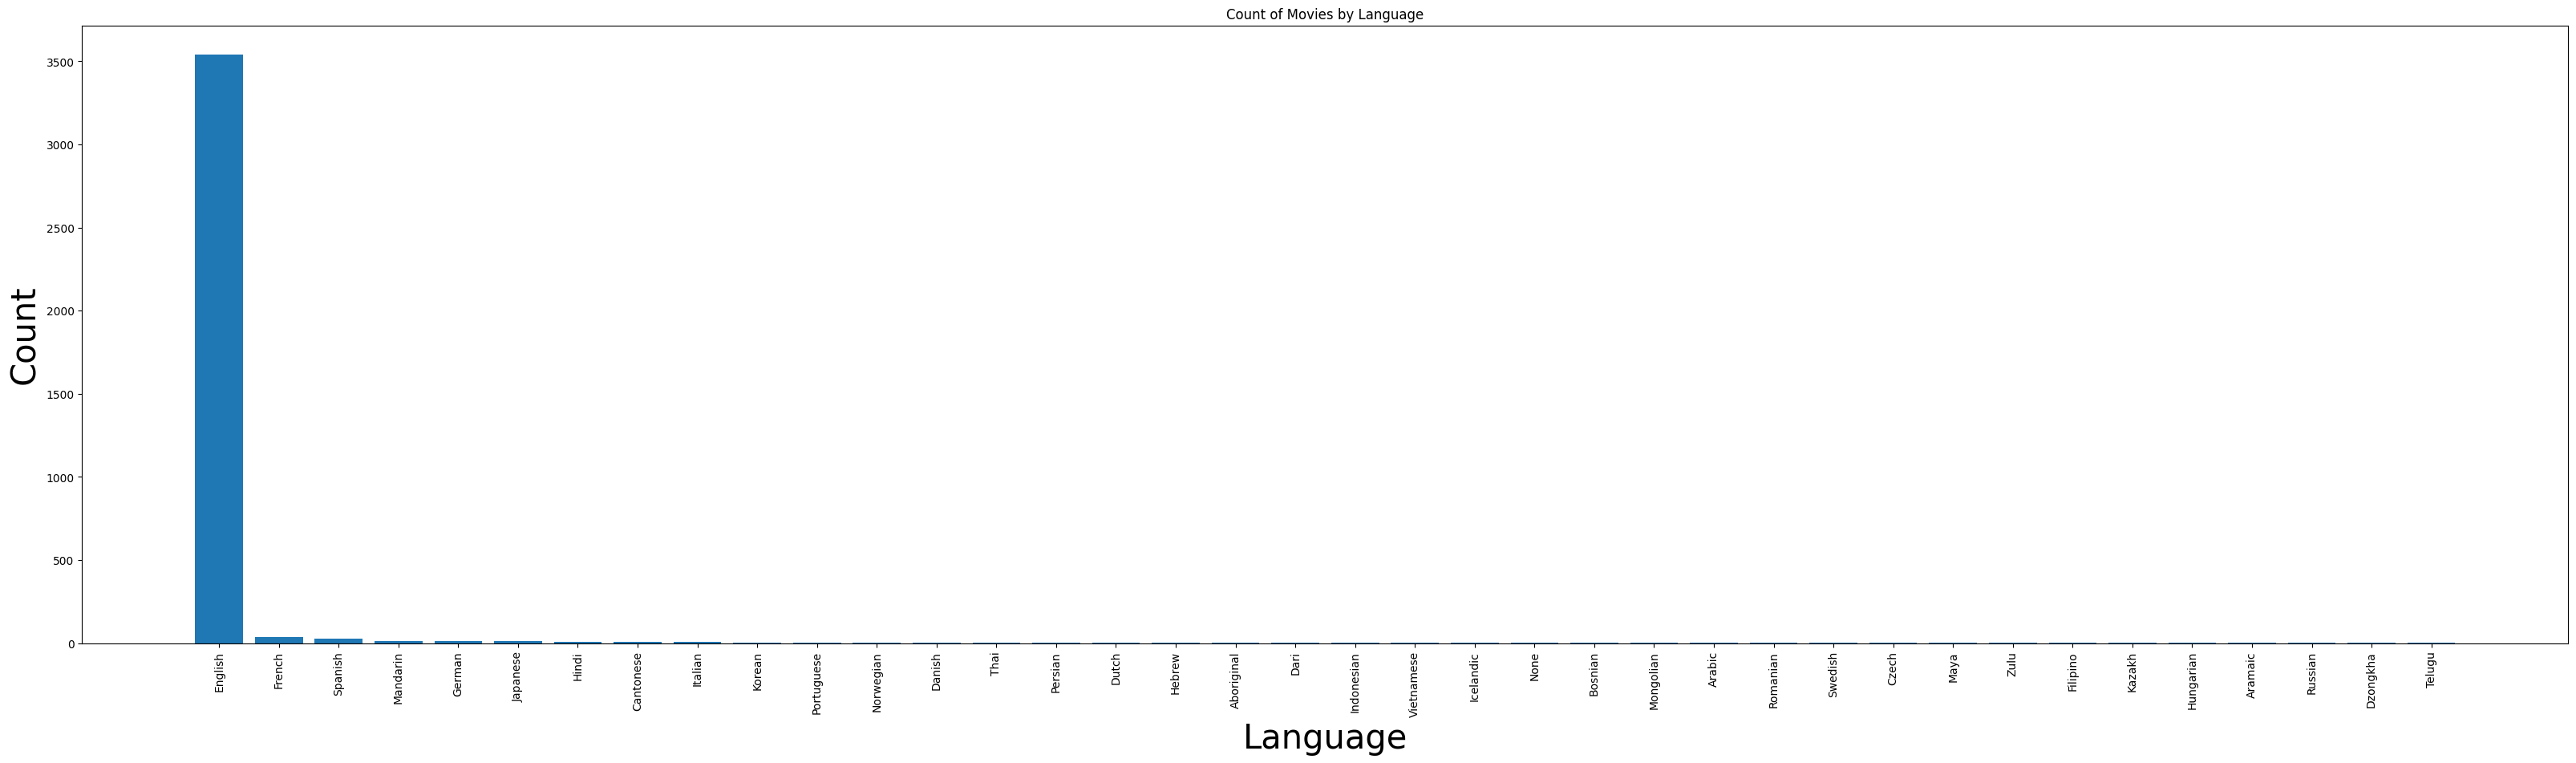

In [ ]:
#displaying in the form of graph
plt.figure(figsize=(40, 10))
plt.bar(movie_df["Language"].value_counts().index, movie_df["Language"].value_counts().values)
plt.xlabel("Language",size=30)
plt.ylabel("Count",size=30)
plt.title("Count of Movies by Language")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#most of them are english so we can drop the Language column
movie_df.drop('Language',axis=1,inplace=True)

In [ ]:
# creating a new column earnings to check the net profit earned by the companies
movie_df["Profit"]=movie_df['Budget'].sub(movie_df['Gross Revenue'], axis = 0)

In [ ]:
#now we are creating a new column earnings_precentage to check the earnings precentage made by companies
movie_df['Profit_Percentage']=(movie_df["Profit"]/movie_df["Gross Revenue"])*100
movie_df

,Title,Release Date,Color/B&W,Genre,Country,Rating,Lead Actor,Director Name,Lead Actor FB Likes,Cast FB Likes,Director FB Likes,Movie FB Likes,IMDb Score (1-10),Total Reviews,Duration (min),Gross Revenue,Budget,Profit,Profit_Percentage
0,Over the Hill to the Poorhouse,9/15/1920,Black and White,Crime,USA,Not Rated,Stephen Carr,Harry F. Millarde,2.0,4,0,0,4.8,1.0,110.0,3000000,100000,-2900000,-96.666667
1,Metropolis,1/26/1927,Black and White,Drama,Germany,Not Rated,Brigitte Helm,Fritz Lang,136.0,203,756,12000,8.3,260.0,145.0,26435,6000000,5973565,22597.181767
2,The Broadway Melody,11-11-1929,Black and White,Musical,USA,Passed,Anita Page,Harry Beaumont,77.0,109,4,167,6.3,36.0,100.0,2808000,379000,-2429000,-86.502849
3,42nd Street,8/29/1933,Black and White,Comedy,USA,Unrated,Ginger Rogers,Lloyd Bacon,610.0,995,24,439,7.7,65.0,89.0,2300000,439000,-1861000,-80.913043
4,Top Hat,4/15/1935,Black and White,Comedy,USA,Approved,Ginger Rogers,Mark Sandrich,610.0,824,10,1000,7.8,66.0,81.0,3000000,609000,-2391000,-79.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3719,Trainwreck,03-09-2015,Color,Comedy,Japan,R,Amy Schumer,Judd Apatow,492.0,1450,0,25000,6.3,332.0,129.0,110008260,35000000,-75008260,-68.184207
3720,Unfinished Business,2/25/2015,Color,Comedy,USA,R,Tom Wilkinson,Ken Scott,1000.0,1564,31,0,5.4,90.0,91.0,10214013,35000000,24785987,242.666492
3721,Vacation,08-03-2015,Color,Adventure,USA,R,Chris Hemsworth,John Francis Daley,26000.0,40312,0,28000,6.1,204.0,99.0,58879132,31000000,-27879132,-47.349767
3722,Victor Frankenstein,03-08-2015,Color,Drama,USA,PG-13,Daniel Radcliffe,Paul McGuigan,11000.0,12876,118,11000,6.0,159.0,110.0,5773519,40000000,34226481,592.818366


In [ ]:
#Value counts for the countries

value_counts=movie_df["Country"].value_counts()
print(value_counts)

USA               2941
UK                 303
France             104
Germany             79
Canada              62
Australia           39
Spain               22
Japan               16
China               14
Hong Kong           13
India               13
Italy               11
Mexico              10
New Zealand          9
Denmark              9
South Korea          8
Ireland              7
Brazil               5
Norway               4
Thailand             4
Iran                 4
Israel               3
South Africa         3
Russia               3
Argentina            3
Netherlands          3
Czech Republic       3
Taiwan               2
Belgium              2
Iceland              2
Romania              2
Hungary              2
Colombia             1
Sweden               1
Philippines          1
New Line             1
Peru                 1
Poland               1
West Germany         1
Aruba                1
Official site        1
Georgia              1
Finland              1
Afghanistan

In [ ]:
#We can see most of the movies are from USA ,UK and the rest of the countries,get top 2 values of index
vals = value_counts[:2].index
print (vals)
movie_df['Country'] = movie_df.Country.where(movie_df.Country.isin(vals), 'other')

Index(['USA', 'UK'], dtype='object')


In [ ]:
#Successfully divided the country into three catogories
movie_df["Country"].value_counts()

USA      2941
other     475
UK        303
Name: Country, dtype: int64

In [ ]:
movie_df.head(10)

,Title,Release Date,Color/B&W,Genre,Country,Rating,Lead Actor,Director Name,Lead Actor FB Likes,Cast FB Likes,Director FB Likes,Movie FB Likes,IMDb Score (1-10),Total Reviews,Duration (min),Gross Revenue,Budget,Profit,Profit_Percentage
0,Over the Hill to the Poorhouse,9/15/1920,Black and White,Crime,USA,Not Rated,Stephen Carr,Harry F. Millarde,2.0,4,0,0,4.8,1.0,110.0,3000000,100000,-2900000,-96.666667
1,Metropolis,1/26/1927,Black and White,Drama,other,Not Rated,Brigitte Helm,Fritz Lang,136.0,203,756,12000,8.3,260.0,145.0,26435,6000000,5973565,22597.181767
2,The Broadway Melody,11-11-1929,Black and White,Musical,USA,Passed,Anita Page,Harry Beaumont,77.0,109,4,167,6.3,36.0,100.0,2808000,379000,-2429000,-86.502849
3,42nd Street,8/29/1933,Black and White,Comedy,USA,Unrated,Ginger Rogers,Lloyd Bacon,610.0,995,24,439,7.7,65.0,89.0,2300000,439000,-1861000,-80.913043
4,Top Hat,4/15/1935,Black and White,Comedy,USA,Approved,Ginger Rogers,Mark Sandrich,610.0,824,10,1000,7.8,66.0,81.0,3000000,609000,-2391000,-79.700000
5,Modern Times,10-07-1936,Black and White,Comedy,USA,G,Paulette Goddard,Charles Chaplin,309.0,352,0,0,8.6,120.0,87.0,163245,1500000,1336755,818.864284
6,Snow White and the Seven Dwarfs,02-02-1937,Color,Animation,USA,Approved,Adriana Caselotti,William Cottrell,82.0,229,0,0,7.7,145.0,83.0,184925485,2000000,-182925485,-98.918483
7,Gone with the Wind,11-12-1939,Color,Drama,USA,G,Hattie McDaniel,Victor Fleming,503.0,1862,149,16000,8.2,157.0,226.0,198655278,3977000,-194678278,-97.998040
8,The Wizard of Oz,04-09-1939,Black and White,Adventure,USA,Passed,Margaret Hamilton,Victor Fleming,695.0,2509,149,14000,8.1,213.0,102.0,22202612,2800000,-19402612,-87.388871
9,Fantasia,5/18/1940,Color,Animation,USA,G,Leopold Stokowski,James Algar,16.0,16,11,3000,7.8,99.0,120.0,76400000,2280000,-74120000,-97.015707


Data Visualization

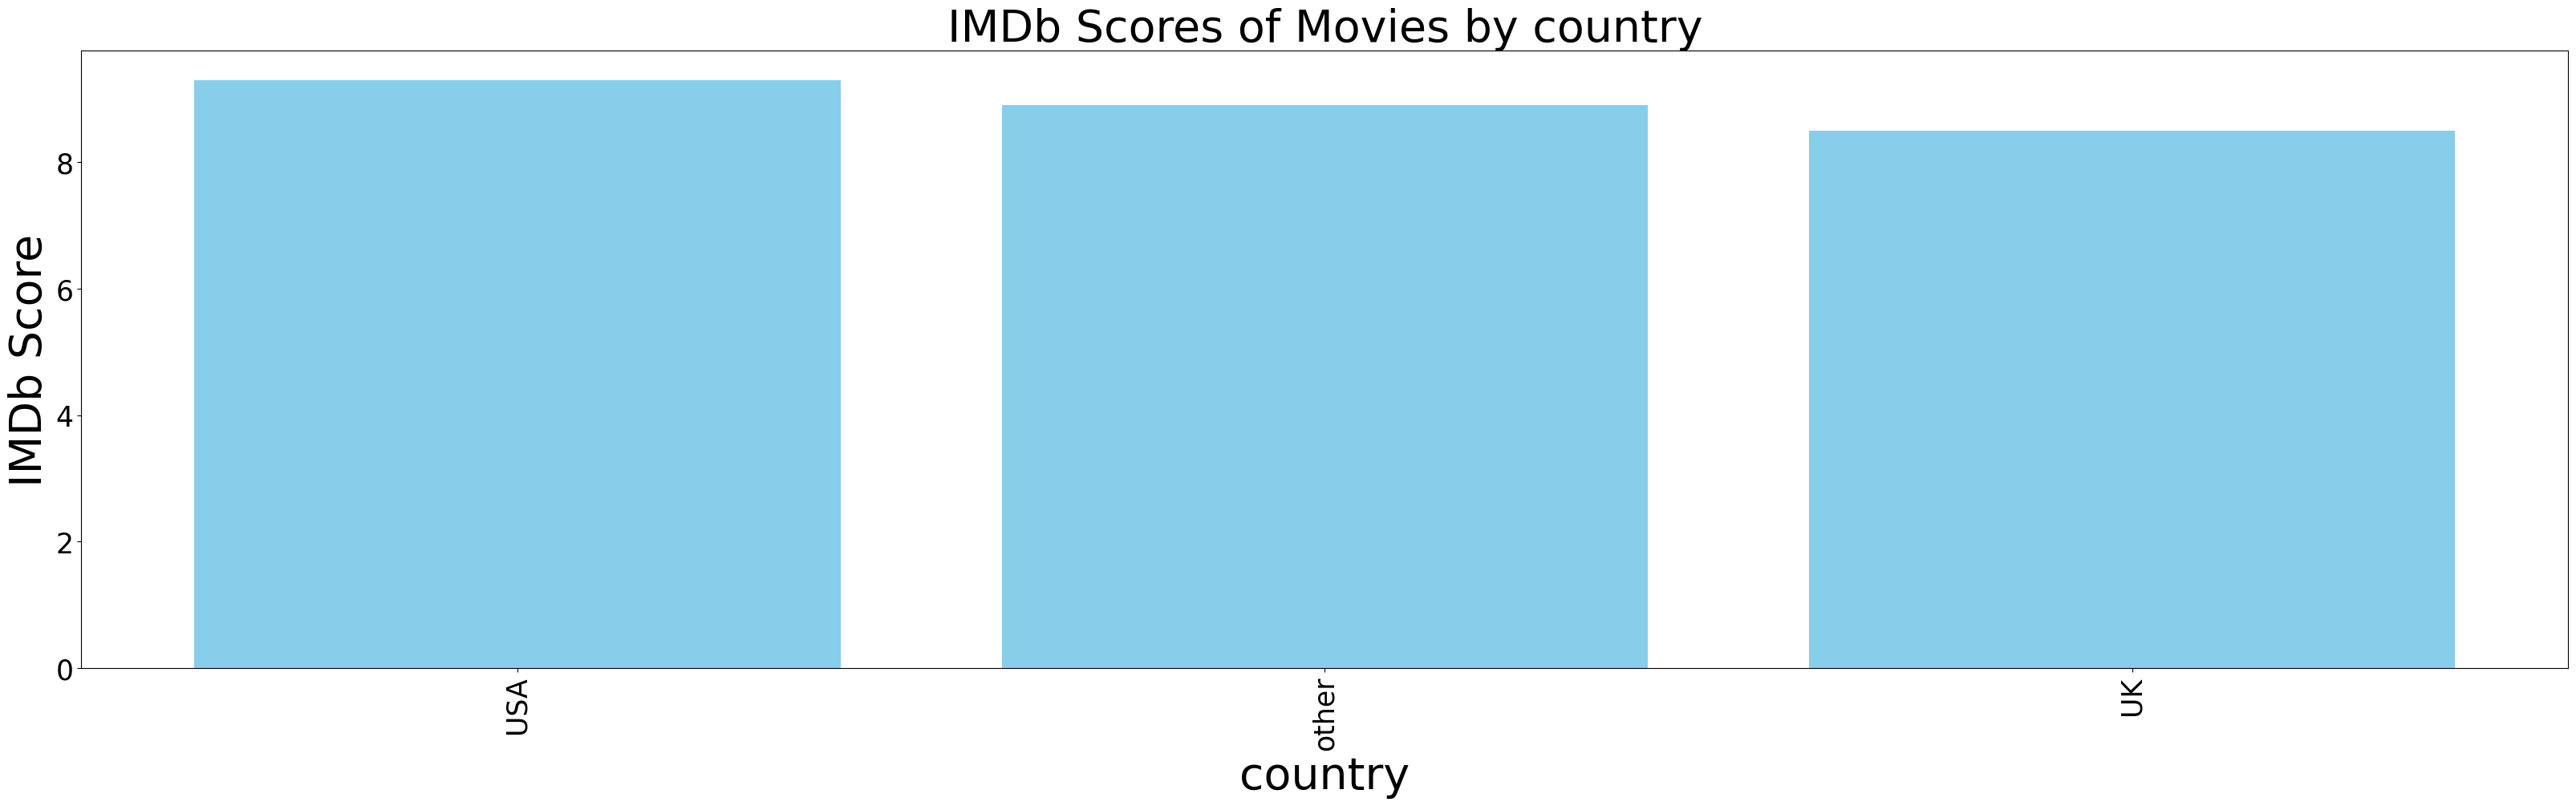

In [ ]:
#checking the relation between imdb scores and country
plt.figure(figsize=(40, 10))
plt.bar(movie_df["Country"], movie_df["IMDb Score (1-10)"], color='skyblue')
plt.xlabel("country",fontsize=40)
plt.ylabel("IMDb Score", fontsize=40)
plt.title("IMDb Scores of Movies by country",fontsize=40)

plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)

plt.show()

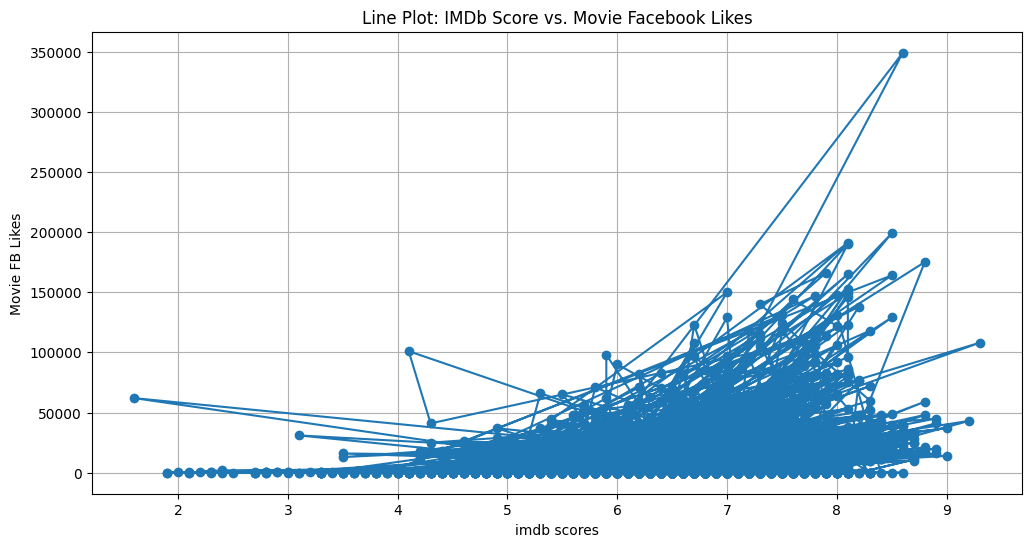

In [ ]:
#checking the relation between imdb scores and movie_facebook_likes
import matplotlib.pyplot as plt

# Check if the columns exist in your DataFrame
if "Movie FB Likes" in movie_df.columns and "IMDb Score (1-10)" in movie_df.columns:
    # Create a line plot
    plt.figure(figsize=(12, 6))
    plt.plot(movie_df["IMDb Score (1-10)"], movie_df["Movie FB Likes"], marker='o', linestyle='-')
    plt.xlabel("imdb scores")
    plt.ylabel("Movie FB Likes")
    plt.title("Line Plot: IMDb Score vs. Movie Facebook Likes")
    plt.grid(True)
    plt.show()
else:
    print("Columns 'movie_facebook_likes' and 'imdb_score' not found in the DataFrame.")

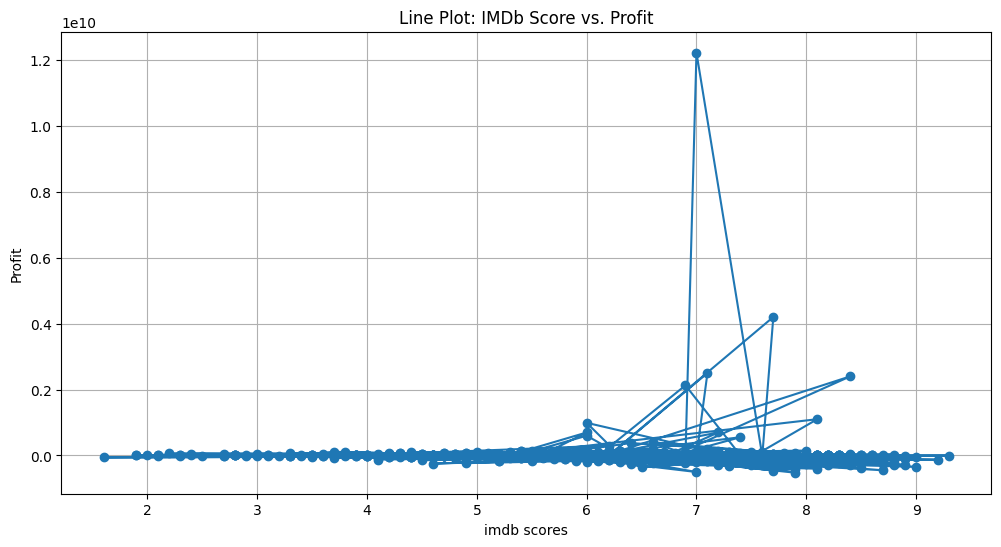

In [ ]:
#imdb scores vs earnings
import matplotlib.pyplot as plt

# Check if the columns exist in your DataFrame
if "Profit" in movie_df.columns and "IMDb Score (1-10)" in movie_df.columns:
    # Create a line plot
    plt.figure(figsize=(12, 6))
    plt.plot(movie_df["IMDb Score (1-10)"], movie_df["Profit"], marker='o', linestyle='-')
    plt.xlabel("imdb scores")
    plt.ylabel("Profit")
    plt.title("Line Plot: IMDb Score vs. Profit")
    plt.grid(True)
    plt.show()
else:
    print("Columns 'earnings' and 'imdb_score' not found in the DataFrame.")

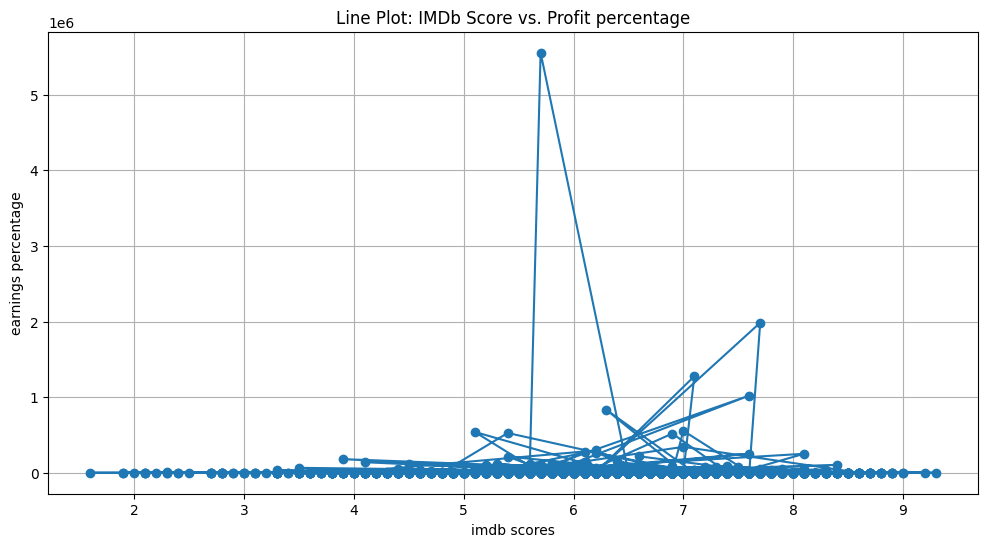

In [ ]:
#imdb scores vs earnings precentage
import matplotlib.pyplot as plt

# Check if the columns exist in your DataFrame
if "Profit_Percentage" in movie_df.columns and "IMDb Score (1-10)" in movie_df.columns:
    # Create a line plot
    plt.figure(figsize=(12, 6))
    plt.plot(movie_df["IMDb Score (1-10)"], movie_df["Profit_Percentage"], marker='o', linestyle='-')
    plt.xlabel("imdb scores")
    plt.ylabel("earnings percentage")
    plt.title("Line Plot: IMDb Score vs. Profit percentage")
    plt.grid(True)
    plt.show()
else:
    print("Columns 'earnings' and 'imdb_score' not found in the DataFrame.")

<ipython-input-29-8771ef65e128>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


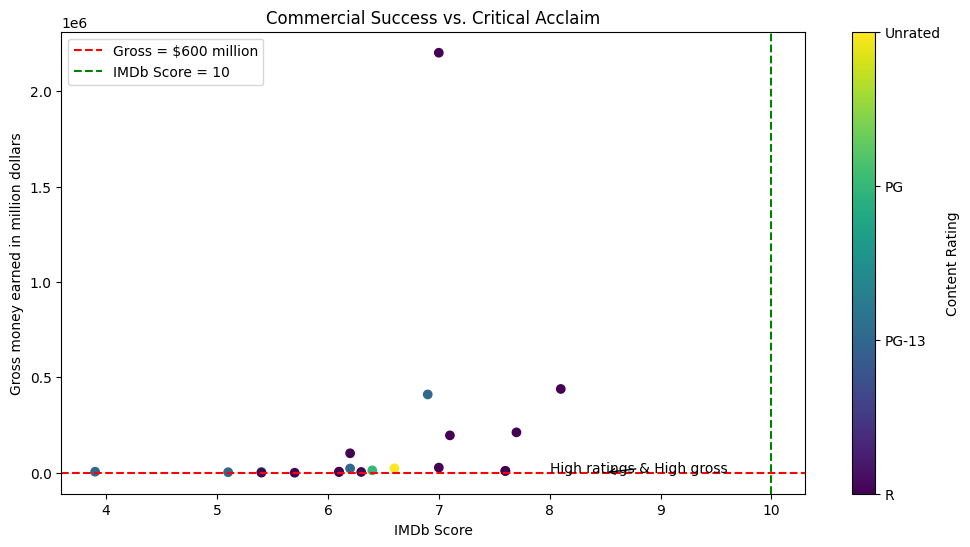

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the top 20 rows based on 'Profit_Percentage' column
movie_df = movie_df.sort_values(by='Profit_Percentage', ascending=False)
movie_df_new = movie_df.head(20)

# Create a mapping of content_rating to unique numeric values
content_rating_mapping = {rating: index for index, rating in enumerate(movie_df_new['Rating'].unique())}
movie_df_new['content_rating_numeric'] = movie_df_new['Rating'].map(content_rating_mapping)

# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(movie_df_new['IMDb Score (1-10)'], movie_df_new['Gross Revenue'], c=movie_df_new['content_rating_numeric'], cmap='viridis')
ax.axhline(y=600, color='red', linestyle='--', label='Gross = $600 million')
ax.axvline(x=10, color='green', linestyle='--', label='IMDb Score = 10')

# Labels and title
ax.set_xlabel('IMDb Score')
ax.set_ylabel('Gross money earned in million dollars')
ax.set_title('Commercial Success vs. Critical Acclaim')
ax.annotate('High ratings & High gross', xy=(8.5, 700), xytext=(8, 900), arrowprops=dict(arrowstyle='->'))

# Create a colorbar with labels
cbar = plt.colorbar(scatter)
cbar.set_ticks(np.arange(len(content_rating_mapping)))
cbar.set_ticklabels(content_rating_mapping.keys())
cbar.set_label('Content Rating')

# Legend
ax.legend()

# Show the plot
plt.show()

By this all comparisons we can conclude that

1.movies with greater imdb scores are produced from country usa 2.the movies with more movie facebook likes are having greater imdb scores 3.The movies with better imdb scores are having more earnings and earnings percentage on average 4.The movies with better ratings were not commercial success 5.there is no relation between year of release and imdb scores most of the movies are released after 1980's

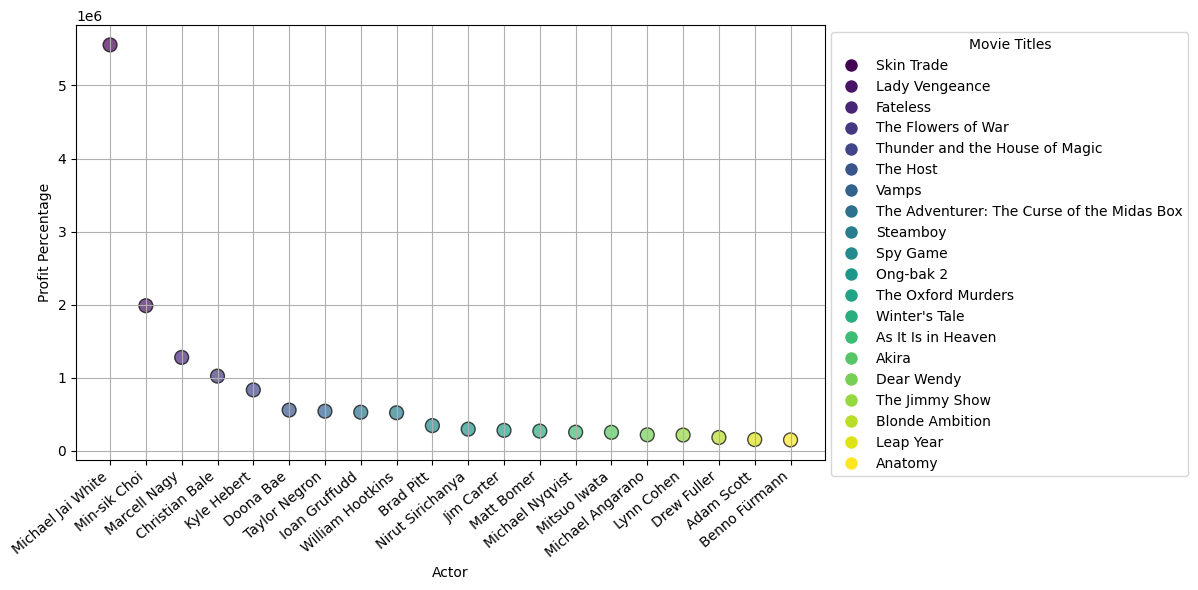

In [ ]:
#top 20 actors names based on commercial success
import pandas as pd
movie_df = movie_df.sort_values(by='Profit_Percentage', ascending=False)
top_10_movies = movie_df.head(20)
plt.figure(figsize=(12, 6))
colors = range(len(top_10_movies))
scatter = plt.scatter(top_10_movies['Lead Actor'], top_10_movies['Profit_Percentage'], c=colors, cmap='viridis', s=100, alpha=0.7, edgecolors='k', linewidths=1)
plt.xlabel('Actor')
plt.ylabel('Profit Percentage')
legend_labels = top_10_movies['Title'].tolist()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(i), markersize=10, label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Movie Titles', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=40, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()

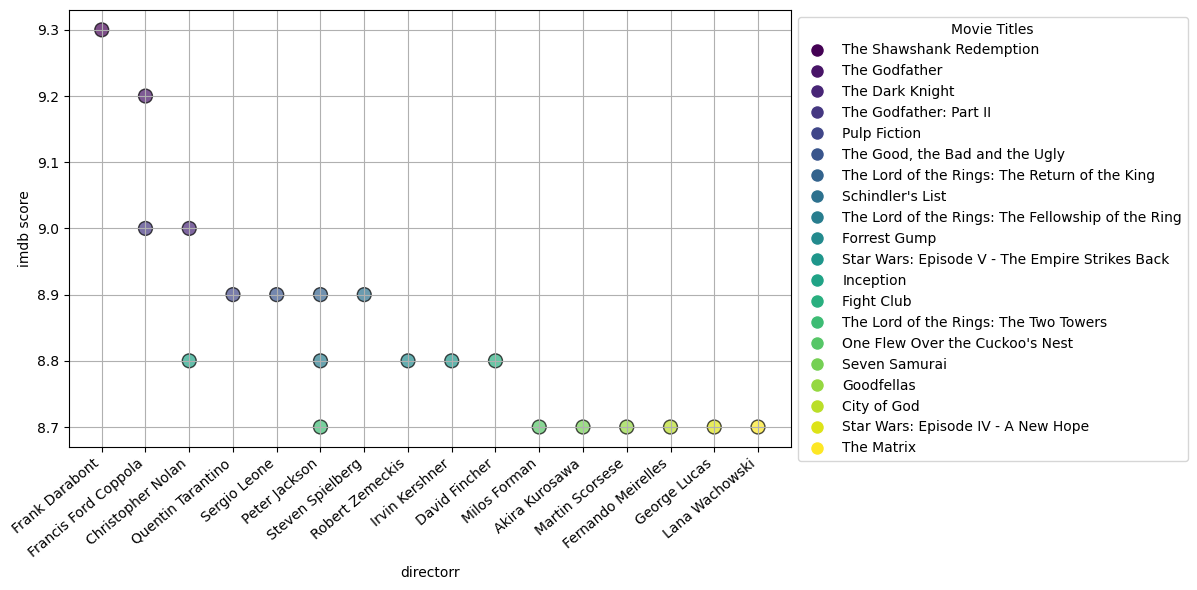

In [ ]:
#top 20 directors based on imdb scores
import pandas as pd
movie_df = movie_df.sort_values(by='IMDb Score (1-10)', ascending=False)
top_20_movies = movie_df.head(20)
plt.figure(figsize=(12, 6))
colors = range(len(top_20_movies))
scatter = plt.scatter(top_20_movies['Director Name'], top_20_movies['IMDb Score (1-10)'], c=colors, cmap='viridis', s=100, alpha=0.7, edgecolors='k', linewidths=1)
plt.xlabel('directorr')
plt.ylabel('imdb score')
legend_labels = top_20_movies['Title'].tolist()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(i), markersize=10, label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Movie Titles', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=40, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()

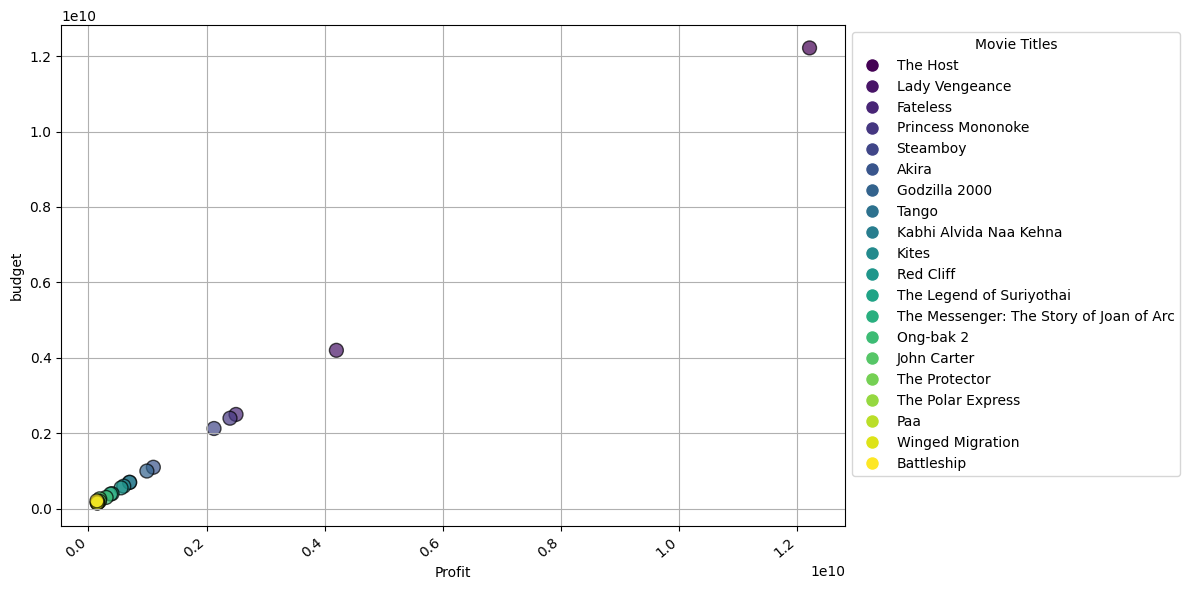

In [ ]:
#top 20 movies based on earnings they made
import pandas as pd
movie_df = movie_df.sort_values(by='Profit', ascending=False)
top_10_movies = movie_df.head(20)
plt.figure(figsize=(12, 6))
colors = range(len(top_10_movies))
scatter = plt.scatter(top_10_movies['Profit'], top_10_movies['Budget'], c=colors, cmap='viridis', s=100, alpha=0.7, edgecolors='k', linewidths=1)
plt.xlabel('Profit')
plt.ylabel('budget')
legend_labels = top_10_movies['Title'].tolist()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(i), markersize=10, label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Movie Titles', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=40, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()

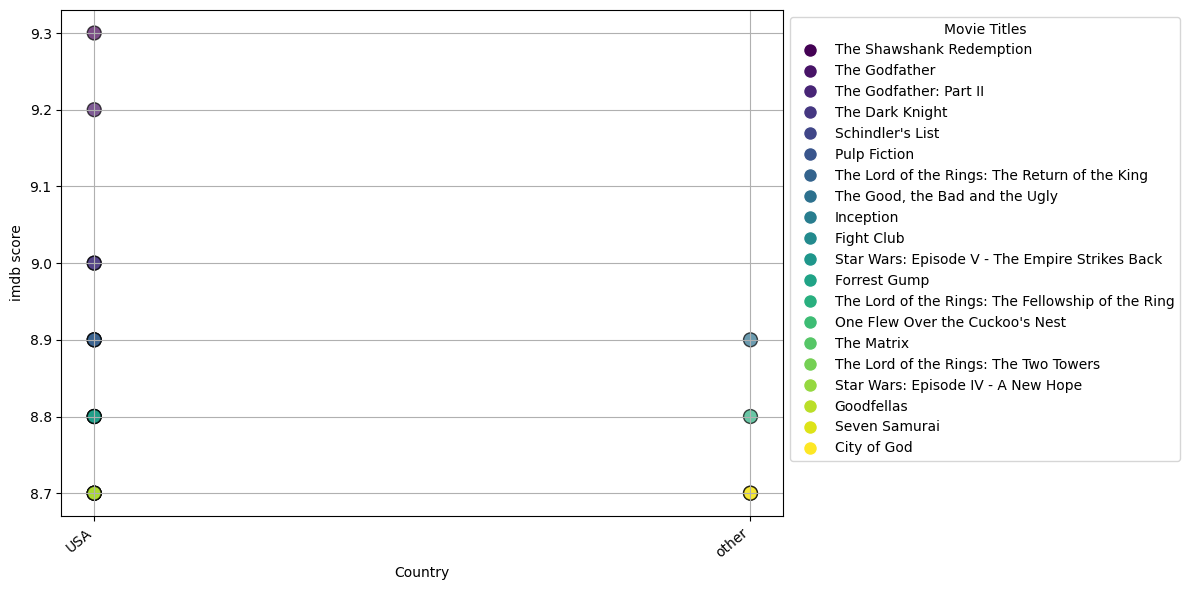

In [ ]:
#country of top 20 movies based on imdb scores
import pandas as pd
movie_df = movie_df.sort_values(by='IMDb Score (1-10)', ascending=False)
top_10_movies = movie_df.head(20)
plt.figure(figsize=(12, 6))
colors = range(len(top_10_movies))
scatter = plt.scatter(top_10_movies['Country'], top_10_movies['IMDb Score (1-10)'], c=colors, cmap='viridis', s=100, alpha=0.7, edgecolors='k', linewidths=1)
plt.xlabel('Country')
plt.ylabel('imdb score')
legend_labels = top_10_movies['Title'].tolist()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(i), markersize=10, label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Movie Titles', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=40, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()

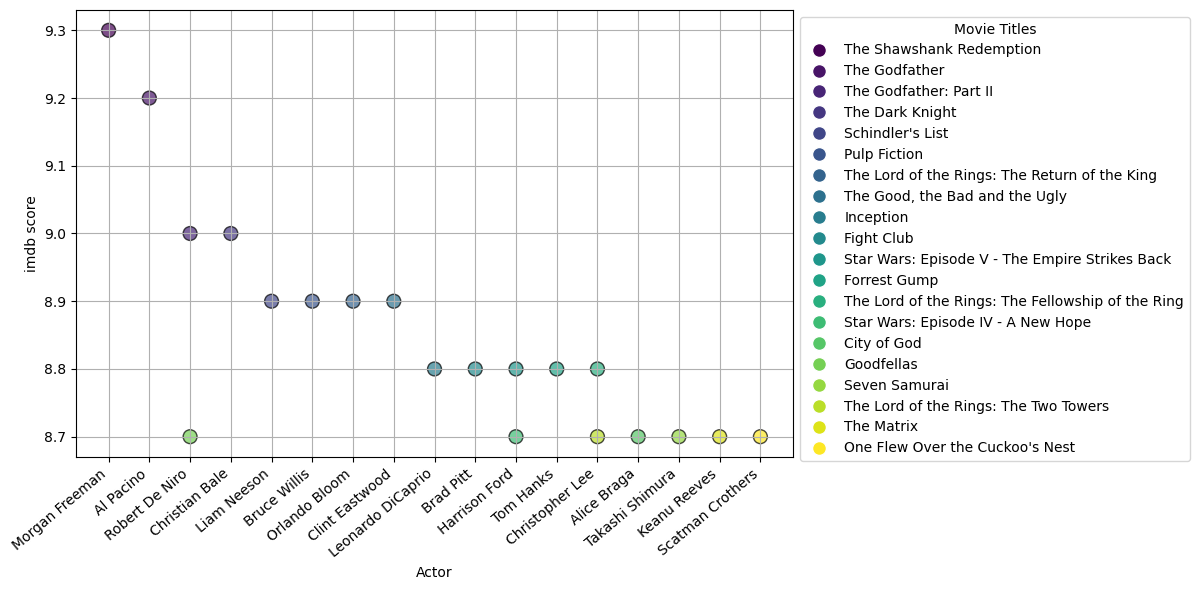

In [ ]:
#top 20 actors names based on imdb scores
import pandas as pd
movie_df = movie_df.sort_values(by='IMDb Score (1-10)', ascending=False)
top_10_movies = movie_df.head(20)
plt.figure(figsize=(12, 6))
colors = range(len(top_10_movies))
scatter = plt.scatter(top_10_movies['Lead Actor'], top_10_movies['IMDb Score (1-10)'], c=colors, cmap='viridis', s=100, alpha=0.7, edgecolors='k', linewidths=1)
plt.xlabel('Actor')
plt.ylabel('imdb score')
legend_labels = top_10_movies['Title'].tolist()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(i), markersize=10, label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Movie Titles', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=40, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()

.Data Preparation for the models

dropping columns with names such as Director Name,Lead Actor etc in the process of data preparation as that columns don't add any new insights and can lead to multicollinearity issues, making it difficult for some models (e.g., linear regression) to estimate the relationships between variables correctly

In [ ]:

movie_df.drop('Director Name', axis=1, inplace=True)
movie_df.drop('Lead Actor',axis=1,inplace=True)
movie_df.drop('Title',axis=1,inplace=True)
movie_df.drop('Color/B&W',axis=1,inplace =True)


In [ ]:
movie_df['Genre'].value_counts()

Comedy         1016
Action          900
Drama           670
Adventure       362
Crime           252
Biography       203
Horror          151
Animation        45
Documentary      40
Fantasy          35
Mystery          23
Sci-Fi            8
Western           3
Family            3
Romance           3
Thriller          3
Musical           2
Name: Genre, dtype: int64

In [ ]:
#Most of the values are equally distributed in genres column ,so we can remove the genres column
movie_df.drop('Genre',axis=1,inplace =True)

In [ ]:
#Remove the linear dependant variables**
# Dropiing the profit column from the dataset
movie_df.drop('Profit',axis=1,inplace=True)
#Dropping the profit percentage column from the dataset
movie_df.drop('Profit_Percentage',axis=1,inplace=True)

<ipython-input-39-aeca09f7f3e3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


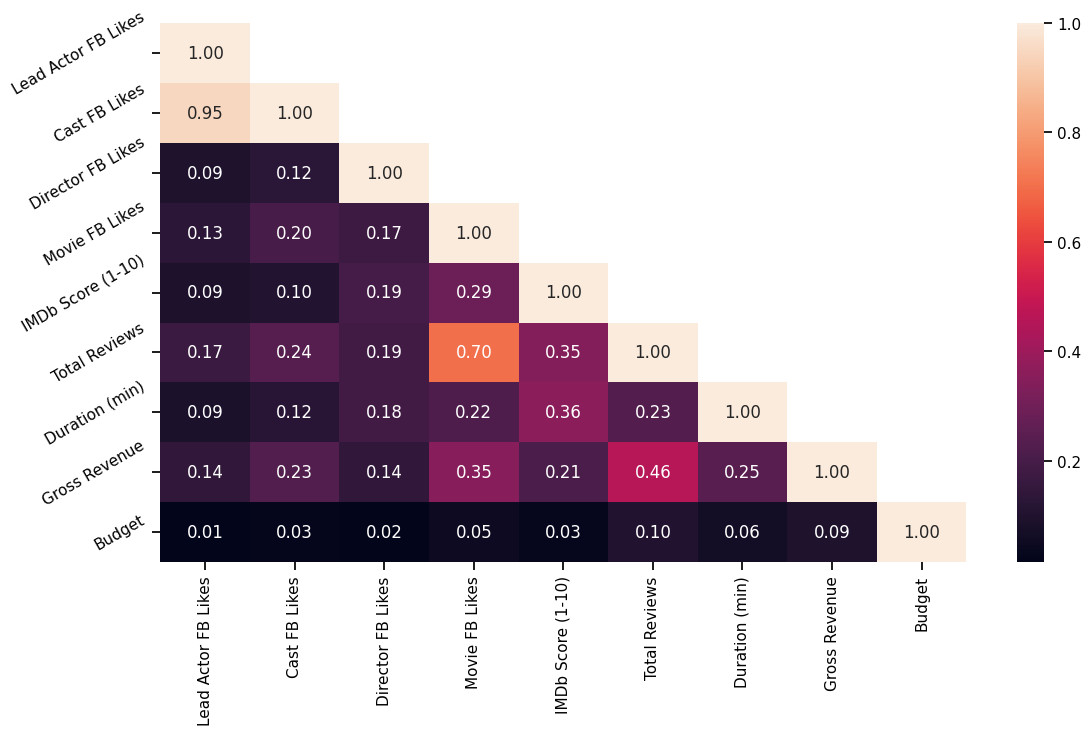

In [ ]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = movie_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [ ]:
movie_df.drop('Cast FB Likes',axis=1,inplace=True)

<ipython-input-41-fa3b5547fe6d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


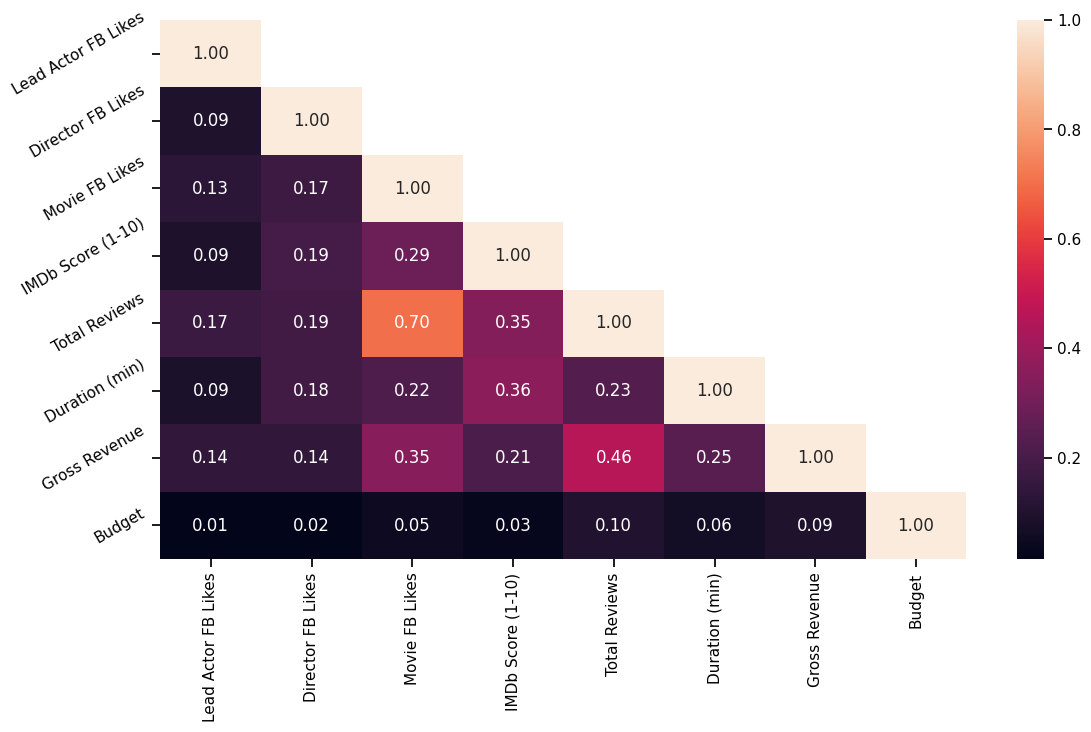

In [ ]:
#new corelation heap map
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = movie_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [ ]:
#categorize the imdb values  in the range of 0-4,4-6,6-8 and 8-10 to mark them as the bad,average,good and excellent movies respectively
movie_df["imdb_score"]=pd.cut(movie_df['IMDb Score (1-10)'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [ ]:
#dropping the IMDB Score(1-10) column as this is replaced with imdb_score
movie_df.drop('IMDb Score (1-10)',axis=1,inplace=True)

In [ ]:
movie_df.head(10)

,Release Date,Country,Rating,Lead Actor FB Likes,Director FB Likes,Movie FB Likes,Total Reviews,Duration (min),Gross Revenue,Budget,imdb_score
482,04-03-1994,USA,R,11000.0,0,108000,199.0,142.0,28341469,25000000,4
57,2/22/1972,USA,R,14000.0,0,43000,208.0,175.0,134821952,6000000,4
65,4/13/1974,USA,R,22000.0,0,14000,149.0,220.0,57300000,13000000,4
2543,05-09-2008,USA,PG-13,23000.0,22000,37000,645.0,152.0,533316061,185000000,4
419,12-02-1993,USA,R,14000.0,14000,41000,174.0,185.0,96067179,22000000,4
464,07-01-1994,USA,R,13000.0,16000,45000,215.0,178.0,107930000,8000000,4
1687,9/21/2003,USA,PG-13,5000.0,0,16000,328.0,192.0,377019252,94000000,4
41,6/25/1966,other,Approved,16000.0,0,20000,181.0,142.0,6100000,1200000,4
2831,03-03-2010,USA,PG-13,29000.0,22000,175000,642.0,148.0,292568851,160000000,4
931,04-03-1999,USA,R,11000.0,21000,48000,315.0,151.0,37023395,63000000,4


Handling the categorical data

In [ ]:
#convert categorical variables ('Country' and 'Rating') in the DataFrame into numerical format (0s and 1s) through one-hot encoding
movie_df = pd.get_dummies(data = movie_df, columns = ['Country'] , prefix = ['Country'] , drop_first = True)
movie_df = pd.get_dummies(data = movie_df, columns = ['Rating'] , prefix = ['Rating'] , drop_first = True)

In [ ]:
#Displaying the data type of the dataset attributes

movie_df.dtypes

Release Date            object
Lead Actor FB Likes    float64
Director FB Likes        int64
Movie FB Likes           int64
Total Reviews          float64
Duration (min)         float64
Gross Revenue            int64
Budget                   int64
imdb_score               int64
Country_USA              uint8
Country_other            uint8
Rating_G                 uint8
Rating_GP                uint8
Rating_M                 uint8
Rating_NC-17             uint8
Rating_Not Rated         uint8
Rating_PG                uint8
Rating_PG-13             uint8
Rating_Passed            uint8
Rating_R                 uint8
Rating_Unrated           uint8
Rating_X                 uint8
dtype: object

In [ ]:
movie_df.drop('Release Date',axis=1,inplace =True)

In [ ]:
movie_df.columns

Index(['Lead Actor FB Likes', 'Director FB Likes', 'Movie FB Likes',
       'Total Reviews', 'Duration (min)', 'Gross Revenue', 'Budget',
       'imdb_score', 'Country_USA', 'Country_other', 'Rating_G', 'Rating_GP',
       'Rating_M', 'Rating_NC-17', 'Rating_Not Rated', 'Rating_PG',
       'Rating_PG-13', 'Rating_Passed', 'Rating_R', 'Rating_Unrated',
       'Rating_X'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'movie_df' contains your dataset
X = movie_df.drop(columns=['imdb_score'])  # Features
y = movie_df[['imdb_score']]  # Target variable

# Split the data into training and testing sets (test_size is set to 0.3, you can adjust it)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer with your chosen strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and fit the Logistic Regression model on the imputed data
logit = LogisticRegression()
logit.fit(X_train_imputed, np.ravel(y_train, order='C'))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [ ]:
y_pred = logit.predict(X_test_imputed)


In [ ]:
#Confusion matrix for logistic regression**

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[  0  11  12   0]
 [  0  94 206   1]
 [  0  57 686   8]
 [  0   0  35   6]]
Accuracy: 0.7043010752688172


In [ ]:

import pandas as pd

# Check for missing values in the entire DataFrame
missing_values = movie_df.isnull().sum()

# Display columns with missing values and the count of missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Optionally, you can also display the rows with missing values
# Here, we assume you have a DataFrame with column names
columns_with_missing = missing_values[missing_values > 0].index.tolist()
rows_with_missing = movie_df[movie_df[columns_with_missing].isnull().any(axis=1)]
print("\nRows with missing values:")
print(rows_with_missing)


Columns with missing values:
Series([], dtype: int64)

Rows with missing values:
Empty DataFrame
Columns: [Lead Actor FB Likes, Director FB Likes, Movie FB Likes, Total Reviews, Duration (min), Gross Revenue, Budget, imdb_score, Country_USA, Country_other, Rating_G, Rating_GP, Rating_M, Rating_NC-17, Rating_Not Rated, Rating_PG, Rating_PG-13, Rating_Passed, Rating_R, Rating_Unrated, Rating_X]
Index: []

[0 rows x 21 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, np.ravel(y_train,order='C'))
knnpred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, knnpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, knnpred))


[[  0  10  13   0]
 [  0 136 165   0]
 [  0  94 655   2]
 [  0   0  41   0]]
Accuracy: 0.7087813620071685


In [ ]:
#SVC
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, np.ravel(y_train,order='C'))
svcpred = svc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, svcpred))

[[  0  13  10   0]
 [  0 138 160   3]
 [  1 149 588  13]
 [  0   7  34   0]]
Accuracy: 0.6505376344086021


In [ ]:
#Naive bayes

from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, np.ravel(y_train,order='C'))
gaussiannbpred = gaussiannb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, gaussiannbpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, gaussiannbpred))

[[ 19   3   0   1]
 [275  13   1  12]
 [530  74  12 135]
 [  8   5   1  27]]
Accuracy: 0.06362007168458782


In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, np.ravel(y_train,order='C'))
dtreepred = dtree.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, dtreepred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, dtreepred))

[[  3  13   7   0]
 [ 12 144 142   3]
 [ 13 155 546  37]
 [  0   3  22  16]]
Accuracy: 0.6353046594982079


In [ ]:
#Ada Boosting
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dtree, n_estimators=60)
abcl=abcl.fit(X_train,np.ravel(y_train,order='C'))
abcl_pred=abcl.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, abcl_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, abcl_pred))

[[  3  11   9   0]
 [ 13 142 143   3]
 [ 12 163 537  39]
 [  0   2  24  15]]
Accuracy: 0.6245519713261649


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, np.ravel(y_train,order='C'))
rfcpred = rfc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))

[[  0  10  13   0]
 [  1 126 174   0]
 [  0  63 684   4]
 [  0   0  32   9]]
Accuracy: 0.7338709677419355


In [ ]:
new_movie_df=movie_df.pop("imdb_score")

In [ ]:
#Bagging classfier

from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=60, max_samples=.7 , oob_score=True)

bgcl = bgcl.fit(movie_df, new_movie_df)
print(bgcl.oob_score_)

0.720892713094918


In [ ]:
#Gradient boosting

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train,np.ravel(y_train,order='C'))
test_pred = gbcl.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, test_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))

[[  0  14   8   1]
 [  4 132 164   1]
 [  2  85 655   9]
 [  0   0  31  10]]
Accuracy: 0.71415770609319


In [ ]:
from sklearn.metrics import classification_report

print('Logistic  Reports\n',classification_report(y_test, y_pred))
print('KNN Reports\n',classification_report(y_test, knnpred))
print('SVC Reports\n',classification_report(y_test, svcpred))
print('Naive BayesReports\n',classification_report(y_test, gaussiannbpred))
print('Decision Tree Reports\n',classification_report(y_test, dtreepred))
print('Ada Boosting\n',classification_report(y_test, abcl_pred))
print('Random Forests Reports\n',classification_report(y_test, rfcpred))
print('Bagging Clasifier',bgcl.oob_score_)
print('Gradient Boosting',classification_report(y_test, test_pred))


Logistic  Reports
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.58      0.31      0.41       301
           3       0.73      0.91      0.81       751
           4       0.40      0.15      0.21        41

    accuracy                           0.70      1116
   macro avg       0.43      0.34      0.36      1116
weighted avg       0.66      0.70      0.66      1116

KNN Reports
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.57      0.45      0.50       301
           3       0.75      0.87      0.81       751
           4       0.00      0.00      0.00        41

    accuracy                           0.71      1116
   macro avg       0.33      0.33      0.33      1116
weighted avg       0.66      0.71      0.68      1116

SVC Reports
               precision    recall  f1-score   support

           1       0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

The conclusion is that Random Forest Algorithm displayed an highest accuracy of 73 then other algorithms
Bagging Clasifier has a accuracy of 72 and gradient boosting has a accuracy of 71